In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'D:\Analytics vidhya\datasets\iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
df.shape

(150, 6)

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.columns=['ID','sepal_length','sepal_width','petal_length','petal_width','species']

In [8]:
df.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.drop(['ID'],axis=1,inplace=True)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.species=df.species.astype('category')

In [12]:
df['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [13]:
df.min()

sepal_length            4.3
sepal_width               2
petal_length              1
petal_width             0.1
species         Iris-setosa
dtype: object

In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
import seaborn as sns

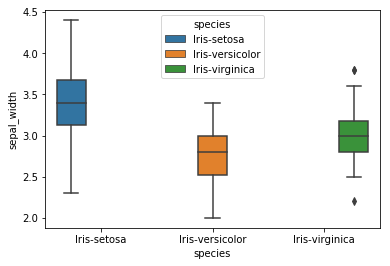

In [16]:

sns.boxplot(data=df,x='species',y='sepal_width',hue='species')

In [111]:
x=df.iloc[:,:4]

In [112]:
y=df.iloc[:,4]

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [114]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x_train=sc.fit_transform(x_train)
#x_test=sc.transform(x_test)

In [115]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y=LabelEncoder()
y=labelencoder_Y.fit_transform(y)

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
y_pred=classifier.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [37]:
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [38]:
cm_train=confusion_matrix(y_train,classifier.predict(x_train))

In [39]:
cm_train

array([[39,  0,  0],
       [ 0, 29,  8],
       [ 0,  0, 44]], dtype=int64)

In [40]:
(39+29+44)/120

0.9333333333333333

In [41]:
(11+12+6)/30

0.9666666666666667

In [73]:

from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=x_train,y=y_train,cv=10)

In [74]:
accuracies

array([1.        , 0.92307692, 0.84615385, 1.        , 0.91666667,
       1.        , 1.        , 0.90909091, 1.        , 0.9       ])

In [75]:
accuracies.mean()

0.9494988344988344

In [45]:
from sklearn.neighbors import KNeighborsClassifier


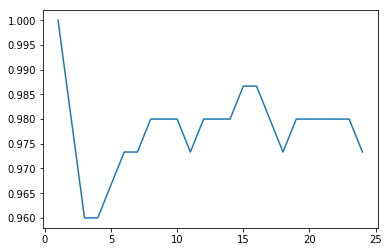

In [48]:
from sklearn import metrics
k_range=list(range(1,25))
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    y_pred=knn.predict(x)
    scores.append(metrics.accuracy_score(y,y_pred))
    
plt.plot(k_range,scores)
plt.show()
    

In [57]:
#KNN
#Fitting classifier
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [58]:

metrics.accuracy_score(y_train,classifier.predict(x_train))

0.975

In [62]:

cm_knn=confusion_matrix(y_train,classifier.predict(x_train))

In [63]:
cm_knn

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  1, 43]], dtype=int64)

In [71]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [72]:
metrics.accuracy_score(y_train,classifier.predict(x_train))

0.95

In [76]:
#SVM

In [118]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)#kernel can be poly,rbf or 
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [121]:
metrics.accuracy_score(y_train,classifier.predict(x_train))

1.0

In [102]:
##Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
cm_dt=confusion_matrix(y_train,classifier.predict(x_train))

In [124]:
cm_dt

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

In [125]:
##Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(max_depth=2)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
metrics.accuracy_score(y_train,classifier.predict(x_train))

0.9583333333333334